In [9]:
import PyPDF2

# Open the PDF file
pdf_file = open('no_considerados/CV.CarlosDamianG. (3).pdf', 'rb')

# Create a PDF reader object
pdf_reader = PyPDF2.PdfReader(pdf_file)

# Extract the text from each page
no_considerado1 = ''
for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    no_considerado1 += page.extract_text()

# Close the PDF file
pdf_file.close()

In [10]:
print(no_considerado1)

 
  
CARLOS DAMIAN 
RAMBLAS GASCA  
PERFIL 
 
CONTACTO  
TELÉFONO:  
4613430358  
 
 
 
CORREO ELECTRÓNICO:  
Damian280597@gmail.com  
AFICIONES  
Música  
Futbol  
 
  
EDUCACIÓN  
Centro de estudios tecnológicos industrial y de servicios No.115  -
Técnico en telecomunicaciones  
Agosto 2012 – Julio 2016  
 
Universidad autónoma de Tamaulipas – Ingeniería en energías 
renovables  
Agosto 2019 - Agosto 202 2 (Trunca)  
 
Quality House – Productividad y calidad personal  
Abril 2018 (16 horas)  
 
Quality House - Básico y junior de calidad  
Julio 2019 (14 horas)  
 
Quality House – Gestión  estratégica  del tiempo  
Octubre 2019 (16 horas)  
 
Instituto estatal de capacitación de Guanajuato - Core Tools  
Febrero 2020 (32 Horas)  
 
EXPERIENCIA  LABORAL  Y CONOCIMIENTOS  
Universidad a utónoma de Tamaulipas ( Ingeniería  en energías 
renovables)  
• Elaboración  de planes y programas para la preservación de 
un servicio de calidad en cuanto a mantenimiento e 
infraestructura  
• Prever

Drop Stopwords

In [11]:
from nltk.corpus import stopwords
stopwords_espanol = stopwords.words('spanish')
stopwords_espanol

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

How does the CV look like to see what kind of stopwords could we include in our dictionary? (The sensitive data is gonna be protected)
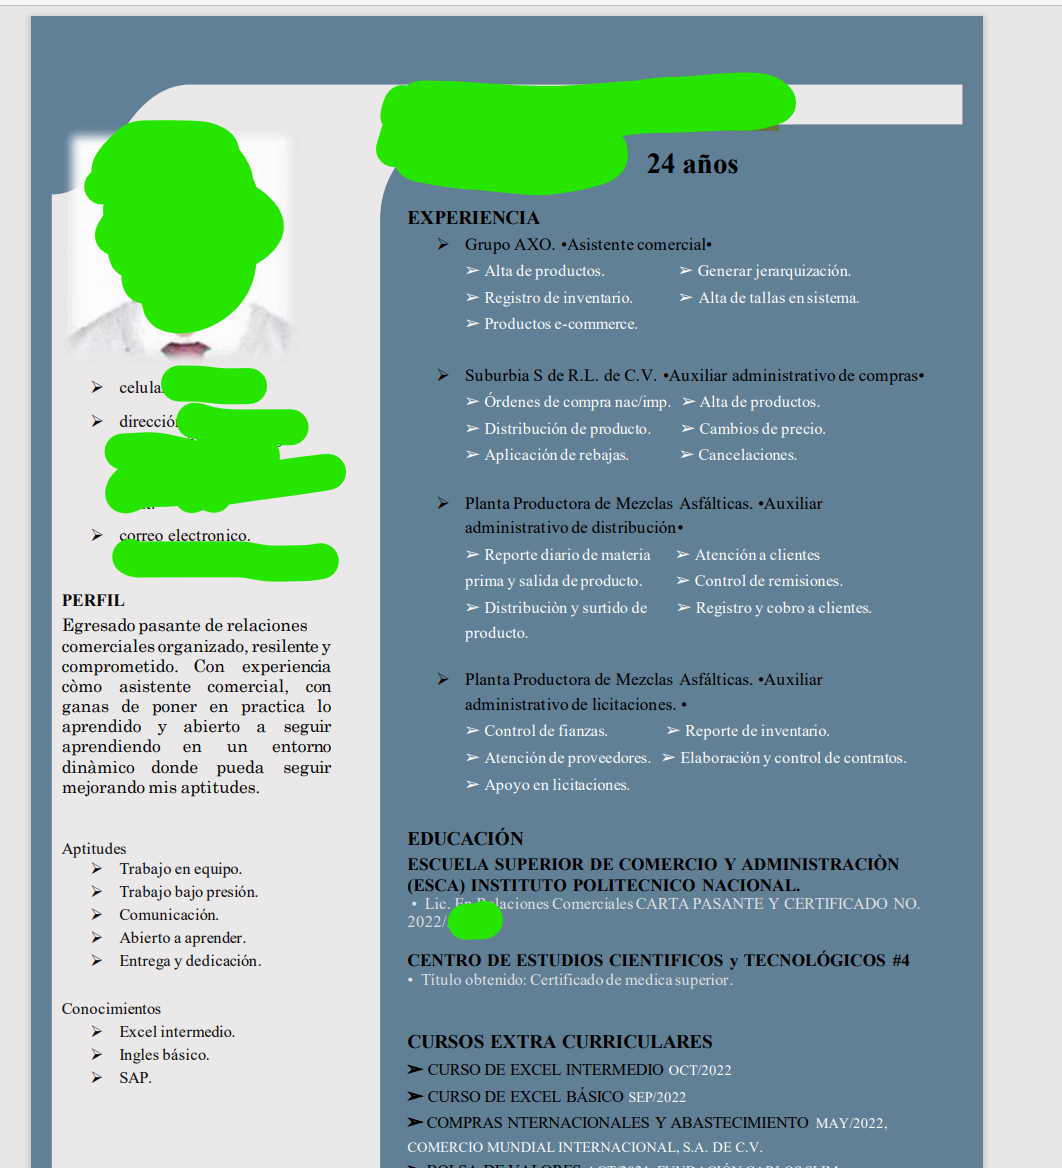

Create another dictionary of repeated words on CV that does not tell us valuable information.

In [31]:
stopwords_cv = ['correo', 'contacto', 'mail', 'email', 'telefono', 'celular','direccion', 'domicilio', 'perfil']

In [32]:
stopwords_espanol = stopwords_espanol + stopwords_cv
stopwords_espanol

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [35]:
import sklearn
#Documentacion https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
#strip_accents: Remove accents and perform other character normalization during the preprocessing step.
vectorizer = CountVectorizer(lowercase = True, strip_accents = 'ascii', analyzer = "word", stop_words = stopwords_espanol)


Extract text for each pdf file and append it to a data frame

In [21]:
import pandas as pd

# Create an empty data frame with column names
df = pd.DataFrame(columns=['raw_text', 'status'])
df


Empty DataFrame
Columns: [raw_text, status]
Index: []

In [22]:
import os
import glob
import PyPDF2


folder_path = "considerados\\"

# Use glob to find all PDF files in the folder
pdf_files = glob.glob(os.path.join(folder_path, "*.pdf"))
# Iterate over each PDF file
for pdf_file in pdf_files:
    # Do something with the PDF file
    # Open the PDF file
    pdf_file = open(pdf_file, 'rb')

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Extract the text from each page
    descripcion = ''
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        descripcion += page.extract_text()

    # Close the PDF file
    pdf_file.close()
    
    df.loc[len(df)] = [descripcion, "considerados"]
    
df


raw_text        status
0  DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...  considerados
1  Ricardo Herrera\nJacobo\nEnergy Engineer with ...  considerados
2   \n \n➢ celular. 5549154946  \n➢ dirección. Av...  considerados
3   \n Herman Gregorio Parra Torcatt   \nCumbres ...  considerados
4  05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...  considerados
5  LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...  considerados

In [23]:
folder_path = "no_considerados\\"

# Use glob to find all PDF files in the folder
pdf_files = glob.glob(os.path.join(folder_path, "*.pdf"))
# Iterate over each PDF file
for pdf_file in pdf_files:
    # Do something with the PDF file
    # Open the PDF file
    pdf_file = open(pdf_file, 'rb')

    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Extract the text from each page
    descripcion = ''
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        descripcion += page.extract_text()

    # Close the PDF file
    pdf_file.close()
    
    df.loc[len(df)] = [descripcion, "no_considerados"]
    
df

incorrect startxref pointer(3)


raw_text           status
0  DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...     considerados
1  Ricardo Herrera\nJacobo\nEnergy Engineer with ...     considerados
2   \n \n➢ celular. 5549154946  \n➢ dirección. Av...     considerados
3   \n Herman Gregorio Parra Torcatt   \nCumbres ...     considerados
4  05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...     considerados
5  LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...     considerados
6                                                     no_considerados
7   \n  \nCARLOS DAMIAN \nRAMBLAS GASCA  \nPERFIL...  no_considerados
8   \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...  no_considerados
9  Nelson Salazar\nIngeniero Electrico\nJerez de ...  no_considerados

In [25]:
df.drop(6, inplace=True)
df

raw_text           status
0  DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...     considerados
1  Ricardo Herrera\nJacobo\nEnergy Engineer with ...     considerados
2   \n \n➢ celular. 5549154946  \n➢ dirección. Av...     considerados
3   \n Herman Gregorio Parra Torcatt   \nCumbres ...     considerados
4  05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...     considerados
5  LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...     considerados
7   \n  \nCARLOS DAMIAN \nRAMBLAS GASCA  \nPERFIL...  no_considerados
8   \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...  no_considerados
9  Nelson Salazar\nIngeniero Electrico\nJerez de ...  no_considerados

Save to csv file to continue adding data 

In [26]:
df.to_csv('my_data.csv', index=False)

Start classification


In [39]:
inputs = df['raw_text']
labels = df['status']

from sklearn.model_selection import train_test_split
inputs_train, inputs_test, Ytrain, Ytest = train_test_split( inputs, labels, random_state=123)
Xtrain = vectorizer.fit_transform(inputs_train) 
Xtrain
Xtest = vectorizer.transform(inputs_test)
Xtest

<3x846 sparse matrix of type '<class 'numpy.int64'>'
	with 234 stored elements in Compressed Sparse Row format>

In [40]:
(Xtrain != 0).sum()

1044

Fitting the model: Naive Bayes model


- Bayes theorem 

Allows you to prove or discard your hypothesis as you you get new data, adjusting your model to this new data 

Example: how likely does the model explain the probability of A with the new evidence of B

- Naives Bayes Classifier
    - Supervisado
    - NLP
    - Clasificación de texto
    - Spam o no spam

Es un modelo que se usa para clasificar clases con probabilidad (generalmente condicional: true or false pertenece a spam), la ventaja es que al entrenar el modelo, cada variable de los datos de entrada

In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score (Xtrain, Ytrain)) 

train score: 1.0


In [43]:
print("test score:", model.score(Xtest,Ytest))

test score: 0.6666666666666666


The 1 index CV of the df is in English while the rest is in Spanish, so since the data is very scarce, we decided to translate this CV to re-train the model again

In [44]:
with open('file.txt', 'r') as f:
    text = f.read()
text

'ricardo herrera\njacobo\nIngeniero EnergÃ©tico con experiencia en\ngestiÃ³n de proyectos a gran escala,\nventas, gestiÃ³n de equipos,\nproyectos interculturales internacionales.\njacoboricardo24@gmail.com\n+52-461-171-0-225\nespaÃ±ol nativo\n30 aÃ±os\nCelaya, Guanajuato.\nMÃ©xico .\nProfesional\n experiencia\nâž¢ Hogar de Ancianos Celaya (2019)\nResponsable de proyectos fotovoltaicos\nâ€¢ Colaborar en el diseÃ±o de sistemas fotovoltaicos\nâ€¢ Trato con proveedores\nâ€¢ Trato con inversores\nâ€¢ Presupuesto\nâ€¢ GestiÃ³n de equipos\nâž¢ AIESEC en Celaya (2016 -2019)\nJefe de equipo, Vicepresidente.\nâ€¢GestiÃ³n de equipos (6 personas)\nâ€¢entrega de resultados\nâ€¢PlanificaciÃ³n\nâ€¢Presupuestos\nâ€¢Experiencias internacionales\nâ€¢ Ventas de divisas internacionales\nâ€¢ trato con los clientes\nâ€¢Seguimiento de procesos\nEducaciÃ³n\nâž¢ Universidad PolitÃ©cnica de Guanajuato (2015 -2021)\no IngenierÃ\xada energÃ©tica:\nâ€¢ ConsultorÃ\xada y auditorÃ\xada energÃ©tica\nâ€¢ Control de ca

[row, col]

In [49]:
df.iloc[1, 0] = text

df

raw_text           status
0  DIEGO RODOLFO HERRER A RUBIO   \nDIEGO RODOLFO...     considerados
1  ricardo herrera\njacobo\nIngeniero EnergÃ©tico...     considerados
2   \n \n➢ celular. 5549154946  \n➢ dirección. Av...     considerados
3   \n Herman Gregorio Parra Torcatt   \nCumbres ...     considerados
4  05/Octubre /2022  \n \n  \nJuan Jorge Aparicio...     considerados
5  LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...     considerados
7   \n  \nCARLOS DAMIAN \nRAMBLAS GASCA  \nPERFIL...  no_considerados
8   \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...  no_considerados
9  Nelson Salazar\nIngeniero Electrico\nJerez de ...  no_considerados

In [50]:
#Guardar data correcto
df.to_csv('my_data.csv', index=False)

In [52]:
inputs = df['raw_text']
labels = df['status']

from sklearn.model_selection import train_test_split
inputs_train, inputs_test, Ytrain, Ytest = train_test_split( inputs, labels, random_state=123)
Xtrain = vectorizer.fit_transform(inputs_train) 
Xtrain
Xtest = vectorizer.transform(inputs_test)
Xtest

<3x823 sparse matrix of type '<class 'numpy.int64'>'
	with 239 stored elements in Compressed Sparse Row format>

In [53]:
model.fit(Xtrain, Ytrain)
print("train score:", model.score (Xtrain, Ytrain)) 

train score: 1.0


In [54]:
print("test score:", model.score(Xtest,Ytest))

test score: 0.3333333333333333


Now with one more correct row, the model performed worse fros everal reasons:
- There is still not much data to train the model with
- The CV's are for different positions which make it more difficult to achive an accurate prediction
- The data set only has two features
- The not considered CVs had all something in common, they had more than one page -> this could also be added to the data set

So all of these conditions could be improved to have a more accurate prediction

Checking prediction for another test data

In [57]:

test_data = vectorizer.transform([text])

The prediction is correct but bc this data has been already seen by the model

In [58]:
y_pred = model.predict(test_data)
y_pred

array(['considerados'], dtype='<U15')

In [60]:
y_pred_proba = model.predict_proba(test_data)
y_pred_proba

array([[1.00000000e+00, 3.69716771e-31]])